## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)
# We can override the default matplotlib styles with those of Seaborn
import seaborn as sns
sns.set()

In [2]:
housing=pd.read_excel('data.xlsx')

In [3]:
housing.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,2021-12-19 00:00:00,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
housing.info()
# total samples/observations=13320
# 8 features and 1 label

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
housing.describe(include='all')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320.0,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117.0,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200.0,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843.0,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


In [6]:
# housing.hist(bins=50, figsize=(20, 9))

In [7]:
# plt.bar(housing['area_type'], height=10, width=0.4)
# plt.show()

In [8]:
housing['availability'].value_counts()

Ready To Move          10581
2021-12-18 00:00:00      307
2021-05-18 00:00:00      295
2021-04-18 00:00:00      271
2021-08-18 00:00:00      200
                       ...  
2021-08-15 00:00:00        1
2021-01-17 00:00:00        1
2021-11-16 00:00:00        1
2021-01-16 00:00:00        1
2021-07-14 00:00:00        1
Name: availability, Length: 81, dtype: int64

In [9]:
housing["total_sqft"].value_counts()

1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: total_sqft, Length: 2117, dtype: int64

In [10]:
# housing['bath'].hist(bins=50, figsize=(10, 5))

In [11]:
housing["balcony"].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [12]:
# housing['price'].hist(bins=50, figsize=(10, 5))

## Handling missing values

In [13]:
housing.isnull().sum() # total missing values

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [14]:
housing_tr=housing.copy()

In [15]:
housing_tr.drop(["society", "balcony", "area_type"], inplace = True, axis=1) #dropping area_type, society and balcony feature from the dataset

In [16]:
housing_tr.isnull().sum()

availability     0
location         1
size            16
total_sqft       0
bath            73
price            0
dtype: int64

In [17]:
housing_tr.dropna(axis=0, inplace=True) #removing the missing observations 

In [18]:
housing_tr.isnull().sum()

availability    0
location        0
size            0
total_sqft      0
bath            0
price           0
dtype: int64

In [19]:
housing_tr["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [20]:
#Adding the "bhk" feature extracted from size
housing_tr["bhk"] = housing_tr["size"].apply(lambda x: int(x.split(" ")[0]))

In [21]:
housing_tr.head()

,availability,location,size,total_sqft,bath,price,bhk
0,2021-12-19 00:00:00,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Ready To Move,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Ready To Move,Kothanur,2 BHK,1200,2.0,51.00,2


In [22]:
housing_tr.drop(["size"], axis=1, inplace=True)

In [23]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   availability  13246 non-null  object 
 1   location      13246 non-null  object 
 2   total_sqft    13246 non-null  object 
 3   bath          13246 non-null  float64
 4   price         13246 non-null  float64
 5   bhk           13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [24]:
housing_tr.total_sqft.unique()

array([1056, 2600, 1440, ..., '1133 - 1384', 774, 4689], dtype=object)

In [25]:
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
# to display values other than float
housing_tr[~housing_tr["total_sqft"].apply(isFloat)].head(10)

,availability,location,total_sqft,bath,price,bhk
30,2021-12-19 00:00:00,Yelahanka,2100 - 2850,4.0,186.000,4
122,2021-03-18 00:00:00,Hebbal,3067 - 8156,4.0,477.000,4
137,2021-03-19 00:00:00,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,2021-12-18 00:00:00,Sarjapur,1145 - 1340,2.0,43.490,2
188,Ready To Move,KR Puram,1015 - 1540,2.0,56.800,2
410,Ready To Move,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,2021-09-18 00:00:00,Hennur Road,1195 - 1440,2.0,63.770,2
648,Ready To Move,Arekere,4125Perch,9.0,265.000,9
661,Ready To Move,Yelahanka,1120 - 1145,2.0,48.130,2
672,2021-03-18 00:00:00,Bettahalsoor,3090 - 5002,4.0,445.000,4


In [27]:
# taking range as input and returning average
# ignoring unit conversion
def convert_sqft(x):
    token=str(x).split('-')
    if (len(token)==2):
        return ((float(token[0])+float(token[1]))/2)
    try:
        return float(x)
    except:
        return None

In [28]:
convert_sqft('2100 - 2850')

2475.0

In [29]:
convert_sqft('1056')

1056.0

In [30]:
housing_tr["total_sqft"]=housing_tr["total_sqft"].apply(convert_sqft)

In [31]:
housing_tr.loc[30]

availability    2021-12-19 00:00:00
location                  Yelahanka
total_sqft                   2475.0
bath                            4.0
price                         186.0
bhk                               4
Name: 30, dtype: object

In [32]:
housing_tr["total_sqft"].describe()

count    13200.000000
mean      1555.302783
std       1237.323445
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1672.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [33]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   availability  13246 non-null  object 
 1   location      13246 non-null  object 
 2   total_sqft    13200 non-null  float64
 3   bath          13246 non-null  float64
 4   price         13246 non-null  float64
 5   bhk           13246 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 1.2+ MB


In [34]:
def relabelAvailability(x):
    values = str(x).split("-")
    try:
        if len(values) > 1:
            return "Soon to be Vacated"
        else:
            return x
    except:
            return ""

In [35]:
housing_tr["availability"] = housing_tr["availability"].apply(relabelAvailability)

In [36]:
housing_tr["availability"].value_counts()

Ready To Move         10564
Soon to be Vacated     2682
Name: availability, dtype: int64

* Examining locations which is a categorical variable. 
* We need to apply dimensionality reduction technique here to reduce number of locations.

In [37]:
housing_tr['location'].describe()

count          13246
unique          1304
top       Whitefield
freq             534
Name: location, dtype: object

In [38]:
housing_tr['location'].apply(lambda x: x.strip())
location_stats=housing_tr.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [39]:
len(location_stats[location_stats<=10])

1063

In [40]:
location_stats_tr=location_stats[location_stats<=10]
location_stats_tr

location
Dodsworth Layout         10
1st Block Koramangala    10
Nagappa Reddy Layout     10
Ganga Nagar              10
Dairy Circle             10
                         ..
 Banaswadi                1
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
whitefiled                1
Name: location, Length: 1063, dtype: int64

In [41]:
len(housing_tr['location'].unique())

1304

In [42]:
housing_tr['location']=housing_tr['location'].apply(lambda x: 'other' if x in location_stats_tr else x)
len(housing_tr['location'].unique())

242

In [43]:
housing_tr.head()

,availability,location,total_sqft,bath,price,bhk
0,Soon to be Vacated,Electronic City Phase II,1056.0,2.0,39.07,2
1,Ready To Move,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Ready To Move,Uttarahalli,1440.0,2.0,62.00,3
3,Ready To Move,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Ready To Move,Kothanur,1200.0,2.0,51.00,2


In [44]:
housing_tr.describe()

,total_sqft,bath,price,bhk
count,13200.000000,13246.000000,13246.000000,13246.000000
mean,1555.302783,2.692586,112.389392,2.801902
std,1237.323445,1.341506,149.076587,1.295758
min,1.000000,1.000000,8.000000,1.000000
25%,1100.000000,2.000000,50.000000,2.000000
50%,1275.000000,2.000000,72.000000,3.000000
75%,1672.000000,3.000000,120.000000,3.000000
max,52272.000000,40.000000,3600.000000,43.000000


## Outlier removal using business knowledge 

In [45]:
# .astype(float) can be used to convert a series to float or some other data type
housing_tr['price_per_sqft']=(housing_tr['price']*100000)/(housing_tr['total_sqft'])
housing_tr

,availability,location,total_sqft,bath,price,bhk,price_per_sqft
0,Soon to be Vacated,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Ready To Move,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Ready To Move,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Ready To Move,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Ready To Move,Kothanur,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,3453.0,4.0,231.00,5,6689.834926
13316,Ready To Move,other,3600.0,5.0,400.00,4,11111.111111
13317,Ready To Move,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.545136
13318,Soon to be Vacated,Padmanabhanagar,4689.0,4.0,488.00,4,10407.336319


In [46]:
# sqft per bedroom =300 i.e.typical threshold must be met otherwise those observations are unusal and must be dropped
housing_tr[housing_tr.total_sqft/housing_tr.bhk<300].head()

,availability,location,total_sqft,bath,price,bhk,price_per_sqft
9,Ready To Move,other,1020.0,6.0,370.0,6,36274.509804
45,Ready To Move,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Ready To Move,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Ready To Move,other,1350.0,7.0,85.0,8,6296.296296
70,Ready To Move,other,500.0,3.0,100.0,3,20000.000000


In [47]:
housing_tr.shape

(13246, 7)

In [48]:
housing_tr = housing_tr[~(housing_tr.total_sqft/housing_tr.bhk<300)]
housing_tr.shape

(12502, 7)

## Outlier removal using mean and std

In [49]:
housing_tr.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [50]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
housing_tr = remove_pps_outliers(housing_tr)
housing_tr.shape

(10244, 7)

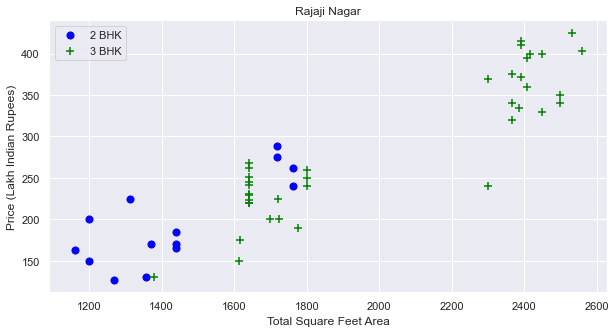

In [51]:
# Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(housing_tr, "Rajaji Nagar")

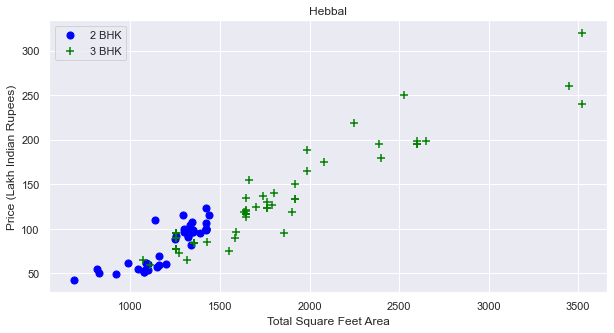

In [52]:
plot_scatter_chart(housing_tr, "Hebbal")

In [53]:
# for a given location, we will build a dictionary of stats per bhk
# We can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
housing_tr= remove_bhk_outliers(housing_tr)
housing_tr.shape

(7342, 7)

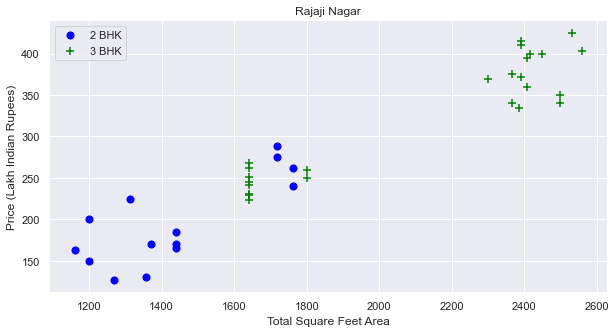

In [54]:
plot_scatter_chart(housing_tr, "Rajaji Nagar")

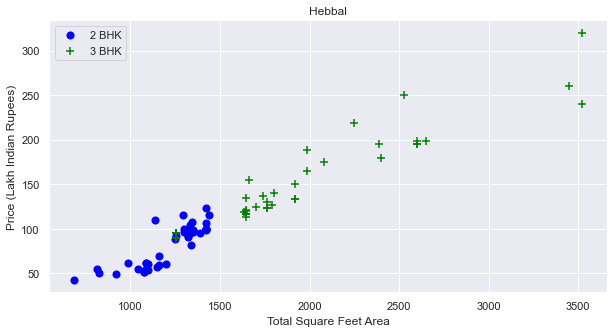

In [55]:
plot_scatter_chart(housing_tr, "Hebbal")

array([[<AxesSubplot:title={'center':'total_sqft'}>,
        <AxesSubplot:title={'center':'bath'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bhk'}>],
       [<AxesSubplot:title={'center':'price_per_sqft'}>, <AxesSubplot:>]],
      dtype=object)

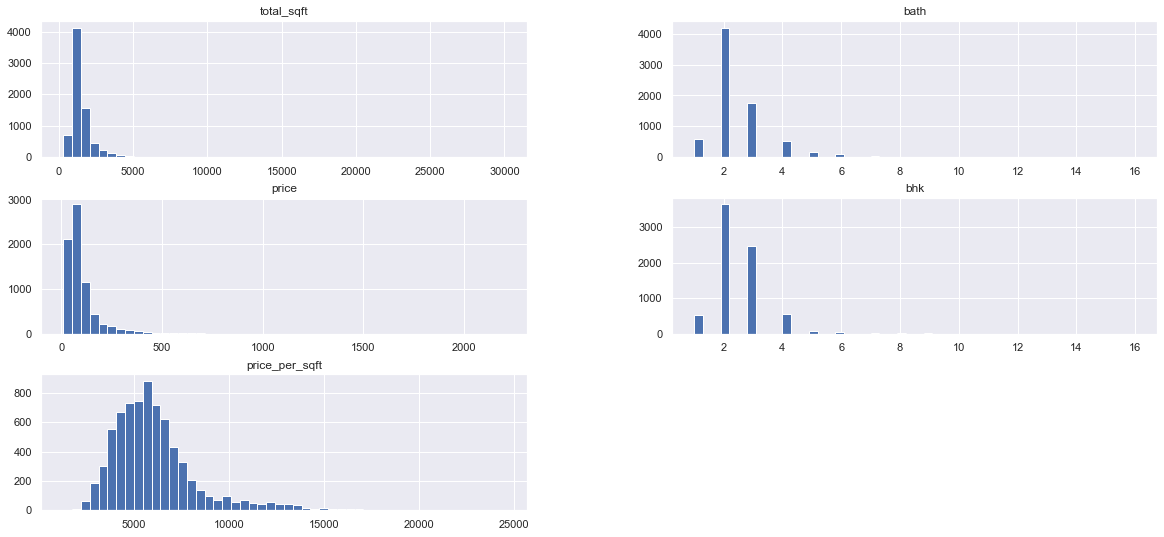

In [56]:
housing_tr.hist(bins=50, figsize=(20, 9))

## Outlier removal for bathroom feature

In [57]:
housing_tr.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

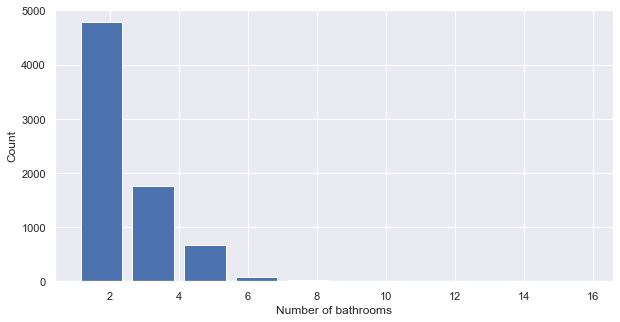

In [58]:
plt.hist(housing_tr.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [59]:
housing_tr[housing_tr.bath>10]

,availability,location,total_sqft,bath,price,bhk,price_per_sqft
5271,Ready To Move,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8481,Ready To Move,other,12000.0,12.0,525.0,10,4375.000000
8570,Ready To Move,other,10000.0,16.0,550.0,16,5500.000000
9309,Ready To Move,other,6000.0,12.0,150.0,11,2500.000000
9641,Ready To Move,other,5425.0,13.0,275.0,13,5069.124424


In [60]:
# It is unusual to have 2 more bathrooms than number of bedrooms in a home
housing_tr[housing_tr.bath>housing_tr.bhk+2]

,availability,location,total_sqft,bath,price,bhk,price_per_sqft
1637,Ready To Move,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5232,Ready To Move,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6702,Ready To Move,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8405,Ready To Move,other,11338.0,9.0,1000.0,6,8819.897689


In [61]:
housing_tr=housing_tr[housing_tr.bath<housing_tr.bhk+2]
housing_tr.shape

(7264, 7)

In [62]:
housing_tr.head()

,availability,location,total_sqft,bath,price,bhk,price_per_sqft
1,Ready To Move,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.000000
2,Ready To Move,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.666667
3,Ready To Move,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.803419
4,Ready To Move,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.403509
5,Ready To Move,Devarachikkanahalli,947.0,2.0,43.0,2,4540.654699


In [63]:
housing_tr=housing_tr.drop(['price_per_sqft'], axis=1)
housing_tr.head()

,availability,location,total_sqft,bath,price,bhk
1,Ready To Move,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Ready To Move,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Ready To Move,Devarachikkanahalli,1170.0,2.0,40.0,2
4,Ready To Move,Devarachikkanahalli,1425.0,2.0,65.0,3
5,Ready To Move,Devarachikkanahalli,947.0,2.0,43.0,2


## Creating dummy variables for regression model

In [64]:
dummies=pd.get_dummies(housing_tr["location"])
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# if we have 'N' categories for a feature we have to create 'N-1' dummies
housing_tr = pd.concat([housing_tr, dummies.drop('other',axis='columns')],axis='columns')
housing_tr.head()

,availability,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Ready To Move,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ready To Move,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ready To Move,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ready To Move,Devarachikkanahalli,1425.0,2.0,65.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Ready To Move,Devarachikkanahalli,947.0,2.0,43.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
housing_tr = housing_tr.drop('location',axis='columns')
housing_tr.head(2)

,availability,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Ready To Move,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ready To Move,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
housing_tr['Ready To Move'] = housing_tr['availability'].map({'Ready To Move': 1, 'Soon to be Vacated': 0})

In [68]:
housing_tr.head(3)

,availability,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Ready To Move
1,Ready To Move,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Ready To Move,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Ready To Move,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [69]:
housing_tr=housing_tr.drop('availability', axis=1)

In [70]:
housing_tr.head(2)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Ready To Move
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Train-Test Splitting

In [71]:
from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(housing_tr, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 5811
Rows in test set: 1453



In [72]:
# separating features and labels
features = train_set.drop("price", axis=1) 
labels = train_set["price"].copy()

In [73]:
features.head(3)

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Ready To Move
2992,1231.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9047,1594.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5917,1100.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Selecting a desired model for real estate

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
# model = LinearRegression()
model = DecisionTreeRegressor()
# model = RandomForestRegressor()
model.fit(features, labels)

DecisionTreeRegressor()

In [100]:
some_data = features.iloc[:5]

In [101]:
some_labels = labels.iloc[:5]

In [102]:
model.predict(some_data)

array([ 49.,  99.,  75., 324.,  58.])

In [103]:
list(some_labels)

[50.0, 99.0, 75.0, 324.0, 58.0]

## Evaluating the model

In [104]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(features)
mse = mean_squared_error(labels, housing_predictions)
rmse = np.sqrt(mse)

In [105]:
rmse

7.7110014326843865

## Cross Validation

In [106]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, features, labels, scoring="neg_mean_squared_error", cv=10) # 10 folds
rmse_scores = np.sqrt(-scores) # since scores are negative 

In [107]:
rmse_scores

array([ 38.68370646,  90.79329201,  34.041447  ,  56.90380734,
       108.89493606,  42.74627614,  46.59993765,  39.42632675,
        32.75410656,  37.18704508])

In [108]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [109]:
print_scores(rmse_scores)

Scores: [ 38.68370646  90.79329201  34.041447    56.90380734 108.89493606
  42.74627614  46.59993765  39.42632675  32.75410656  37.18704508]
Mean:  52.803088105076924
Standard deviation:  24.742881321449737


In [111]:
model.score(features, labels)

0.9924728013920238